# Présentation des résultats des données du fichier 'Copie de Moyenne_10Min_Fabien_TempsFrequence.xlsx'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal as sg
import pandas_signal as pds
from IPython.display import display, HTML  # pour l'affichage double
import datetime
sns.set()

In [2]:
eeg = pd.read_excel('Copie de Moyenne_10Min_Fabien_TempsFrequence.xlsx')
eeg.index = eeg.iloc[:, 1]



eeg.columns = eeg.iloc[0, :]
eeg0 = eeg.iloc[1:, :]
eeg1 = eeg0.dropna(axis=1, how='all')


#eeg0 = indice_temps(eeg)

display(eeg1)



Numéro de Période,Time (epoch),Numéro de Période,P03 Moyenne Delta Fz-Cz,P03 Moyenne Theta Fz-Cz,P03 Moyenne Alpha Fz-Cz,P03 Moyenne Beta Fz-Cz,P03MoyenneDET Fz-Cz,P03MoyennePE Fz-Cz,P03MoyenneLAM Fz-Cz,P03MoyenneSVDE Fz-Cz,...,S03-Yeux,Mean Mag.(dB),Mean Freq.(Hz),Mean Total (X),Mean_RR,SDNN,HFn,RatioLH/HF,Time_S03,S03_Sum_Density_10min
Numéro de Période,,,,,,,,,,,,,,,,,,,,,
1,20,1,0.908394,0.0853768,0.00564216,6.27915e-05,0.138133,0.908244,0.0897793,0.500112,...,1,13.73,4.9,18.63,1039,304,0.72,0.38,17:00:00,0
2,40,2,0.905804,0.0878929,0.0062042,7.52185e-05,0.132322,0.908442,0.0911972,0.49664,...,1,13.855,5.25,19.105,1054,106,0.61,0.64,17:10:00,0
3,60,3,0.898509,0.0949082,0.00647619,5.82393e-05,0.131757,0.909717,0.0880102,0.506848,...,1,13.425,5.2,18.625,1045,100,0.49,1.04,17:20:00,0
4,80,4,0.896669,0.0971866,0.00678274,7.84455e-05,0.139731,0.91422,0.0923444,0.502508,...,1,13.605,4.9,18.505,953,95,0.36,1.75,17:30:00,0
5,100,5,0.884968,0.107745,0.0083709,9.54687e-05,0.154378,0.921222,0.103217,0.499975,...,1,13.735,5.5,19.235,979,86,0.54,0.86,17:40:00,0
6,120,6,0.829997,0.148279,0.0214963,0.000197323,0.205932,0.956618,0.145031,0.5663,...,1,13.675,6.35,20.025,1023,84,0.44,1.27,17:50:00,0
7,140,7,0.832092,0.148644,0.0189909,0.000167716,0.210468,0.951999,0.148734,0.550302,...,1,13.49,6,19.49,1044,124,0.48,1.07,18:00:00,0
8,160,8,0.875487,0.111739,0.0114611,9.87513e-05,0.186517,0.932392,0.126917,0.50654,...,1,13.12,5.3,18.42,1034,251,0.69,0.44,18:10:00,0
9,180,9,0.911683,0.0835174,0.00498537,7.98324e-05,0.137078,0.905377,0.0923668,0.48712,...,1,13.6789,5.63158,19.3105,975,331,0.68,0.48,18:20:00,0


## Sélection des données selon le patient désiré

In [55]:
def temps_index_patient(data, patient, date=None):
    if date is None:
        date = '2014-01-13 19:40:00' # date dedébut pour p03
    t1 = (str(data.index[1])[-5:-3])
    t0 = (str(data.index[0])[-5:-3])
    time_step = int(t1)- int(t0) # date pour eeg
    if time_step == 0:
        time_step = int(str(data.index[1])[-2:]) - int(str(data.index[0])[-2:])  # date pour eeg2
    freq = str(time_step) + 'min'
    periode = len(data.index) 
    dtindex = pd.date_range(start=date, periods=periode, freq=freq)
    dtindex = pd.DataFrame(dtindex)
    dtindex.rename(columns={0: 'Temps'}, inplace=True)
    return dtindex

def patient(data, numero_patient):
    # Permet de sélectionner les données d'un patient
    col_concernees = []
    for i in range(len(data.iloc[0, :])):
        verif = data.columns[i].find(numero_patient)
        if verif != -1:
            col_concernees.append(data.columns[i])
    data_return = data[col_concernees]
    temps = 'Time_' + numero_patient
    data_return.set_index(temps, inplace=True)
    data_return = data_return.dropna()
    dtindex = temps_index_patient(data_return, numero_patient)
    data_return0 = pd.concat([data_return, dtindex], axis=1)
    for i in range(len(dtindex)):
        if data_return0.iloc[i, -1] is pd.NaT:
            data_return0.iloc[i, -1] = pd.Timestamp(2014, 1, 13, 19, 40, 0) + pd.Timedelta(minutes=10*i)
    N = int(len(data_return0))
    data_return0 = data_return0.iloc[:N//2, :]
    data_return0.set_index('Temps', inplace=True)
    return data_return0

p03 = patient(eeg1, 'P03')
display(p03)

/home/david/.virtualenvs/Py36/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'datetime.time' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,P03 Moyenne Delta Fz-Cz,P03 Moyenne Theta Fz-Cz,P03 Moyenne Alpha Fz-Cz,P03 Moyenne Beta Fz-Cz,P03MoyenneDET Fz-Cz,P03MoyennePE Fz-Cz,P03MoyenneLAM Fz-Cz,P03MoyenneSVDE Fz-Cz,P03MoyenneDFA Fz-Cz,P03MoyenneSF Fz-Cz,P03MoyenneSkewness Fz-Cz,P03MoyenneVariance Fz-Cz,P03MoyenneMeans Fz-Cz,P03MoyenneKurtosis Fz-Cz,P03_Sum_Density_10min,P03-Yeux
Temps,,,,,,,,,,,,,,,,
2014-01-13 19:40:00,0.908394,0.0853768,0.00564216,6.27915e-05,0.138133,0.908244,0.0897793,0.500112,1.04427,0.000226872,737.409,158.031,-0.00262385,75017.8,2,0.0667
2014-01-13 19:50:00,0.905804,0.0878929,0.0062042,7.52185e-05,0.132322,0.908442,0.0911972,0.49664,1.04669,0.000390836,639.369,160.863,0.0203927,72964,6,0
2014-01-13 20:00:00,0.898509,0.0949082,0.00647619,5.82393e-05,0.131757,0.909717,0.0880102,0.506848,1.05159,0.000196962,718.977,165.711,0.00600827,80709.8,1,0.025
2014-01-13 20:10:00,0.896669,0.0971866,0.00678274,7.84455e-05,0.139731,0.91422,0.0923444,0.502508,1.06301,0.000331215,494.709,147.32,-0.0104641,63283.5,6,0
2014-01-13 20:20:00,0.884968,0.107745,0.0083709,9.54687e-05,0.154378,0.921222,0.103217,0.499975,1.09089,0.000362352,339.042,124.717,0.00392111,48677.5,5,0
2014-01-13 20:30:00,0.829997,0.148279,0.0214963,0.000197323,0.205932,0.956618,0.145031,0.5663,1.09899,0.000462267,12.4515,44.7509,-0.000635708,8036.23,0,0
2014-01-13 20:40:00,0.832092,0.148644,0.0189909,0.000167716,0.210468,0.951999,0.148734,0.550302,1.15443,0.000304824,8.0842,44.1701,0.000685125,6467.04,0,0
2014-01-13 20:50:00,0.875487,0.111739,0.0114611,9.87513e-05,0.186517,0.932392,0.126917,0.50654,1.14807,0.000204364,344.361,101.405,-0.00550599,40179,2,0
2014-01-13 21:00:00,0.911683,0.0835174,0.00498537,7.98324e-05,0.137078,0.905377,0.0923668,0.48712,1.0698,0.000347223,811.241,178.557,0.0106515,93409.4,5,0


## Sélection des données selon le paramètre désiré

In [32]:
delta = pds.parametre_columns(eeg1, 'Delta')
display(delta)

Numéro de Période,P03 Moyenne Delta Fz-Cz,P04 Moyenne Delta Fz-Cz,P05 Moyenne Delta Fz-Cz,P06 Moyenne Delta Fz-Cz,P07 Moyenne Delta Fz-Cz,P08 Moyenne Delta Fz-Cz,P09 Moyenne Delta Fz-Cz,P10 Moyenne Delta Fz-Cz,P11 Moyenne Delta Fz-Cz,P11bisMoyenne Delta Fz-Cz,...,P13Moyenne Delta Fz-Cz,P14 Moyenne Delta Fz-Cz,P15 Moyenne Delta Fz-Cz,P16 Moyenne Delta Fz-Cz,P17 Moyenne Delta Fz-Cz,P18 Moyenne Delta Fz-Cz,P20 Moyenne Delta Fz-Cz,S01 Moyenne Delta Fz-Cz,S02 Moyenne Delta Fz-Cz,S03 Moyenne Delta Fz-Cz
Numéro de Période,,,,,,,,,,,,,,,,,,,,,
1,0.908394,0.81825,0.959888,0.868175,0.862944,0.869802,0.897013,0.642208,0.914183,0.764493,...,0.315304,0.836448,0.909849,0.855987,0.866208,0.771231,0.904594,0.849019,0.780902,0.774692
2,0.905804,0.770838,0.956625,0.850481,0.865755,0.900756,0.883861,0.712022,0.931313,0.646659,...,0.331937,0.842533,0.904274,0.832367,0.86908,0.760308,0.909611,0.811231,0.777067,0.74631
3,0.898509,0.760383,0.959583,0.862334,0.856273,0.744582,0.910593,0.595239,0.936002,0.657783,...,0.302596,0.757724,0.932283,0.832169,0.862488,0.808538,0.910818,0.814005,0.775814,0.770229
4,0.896669,0.742402,0.96668,0.866527,0.852476,0.833172,0.910477,0.758973,0.923941,0.687018,...,0.311995,0.695859,0.918621,0.820351,0.869614,0.80066,0.904443,0.817203,0.754363,0.78823
5,0.884968,0.755206,0.962394,0.859781,0.855661,0.815402,0.89145,0.656534,0.88648,0.659987,...,0.303755,0.65705,0.904654,0.791382,0.856809,0.812451,0.908599,0.806186,0.794282,0.768115
6,0.829997,0.767544,0.961153,0.854041,0.851699,0.791436,0.814985,0.671199,0.947463,0.633051,...,0.309348,0.685357,0.916249,0.815121,0.861174,0.747554,0.89687,0.798355,0.806078,0.761075
7,0.832092,0.742653,0.969137,0.85848,0.855468,0.89284,0.787888,0.731964,0.919554,0.797681,...,0.313338,0.690645,0.924691,0.843405,0.867794,0.666508,0.913938,0.760016,0.78522,0.764903
8,0.875487,0.83589,0.96308,0.857604,0.840616,0.88461,0.812268,0.735802,0.858003,0.656188,...,0.342091,0.698864,0.922029,0.873484,0.861052,0.687862,0.919696,0.766996,0.785014,0.755462
9,0.911683,0.813782,0.95433,0.835915,0.861344,0.765986,0.821877,0.749871,0.90954,0.631383,...,0.310096,0.701078,0.912303,0.860105,0.868022,0.721674,0.905356,0.814074,0.784366,0.75522


## Sélection des données selon le patient et le paramètre désiré

In [33]:
p03delta = pds.parametre_columns(p03, 'Delta')
p03delta


,P03 Moyenne Delta Fz-Cz
Temps,
2014-01-13 19:40:00,0.908394
2014-01-13 19:50:00,0.905804
2014-01-13 20:00:00,0.898509
2014-01-13 20:10:00,0.896669
2014-01-13 20:20:00,0.884968
2014-01-13 20:30:00,0.829997
2014-01-13 20:40:00,0.832092
2014-01-13 20:50:00,0.875487
2014-01-13 21:00:00,0.911683


## On rend les données exploitables en enlevant les lignes avec des NaN

Il faudrait essayer de trouver une autre solution

In [34]:
def conversion_data_obj_float(data, l0=0, l_fin=None, col0=0, col_fin=None):
    if len(data.shape) == 1:
        data.iloc[l0:l_fin] = data.iloc[l0:l_fin].astype(np.float64)
        return data
    elif len(data.shape) == 2:
        # Si data est une dataframe avec au moins 2 colonnes:
        data.iloc[l0:l_fin, col0:col_fin] = data.iloc[l0:l_fin, col0:col_fin].astype(np.float64)
        return data
    else:
        # Si data n'est pas une dataframe:
        return "Erreur : ", data, " n'est pas une dataframe"

    
def enleve_date_data(data):
    data_to_return = pd.DataFrame()
    for i in range(len(data.iloc[0, :])):
        verif = data.iloc[0, i].find('Time')
        if verif == -1:
            data_to_return = pd.concat([data_to_return, data.iloc[:, i]], axis=1, sort=False)
    return data_to_return

def nom_objet(obj):
    nom = set(varname for varname, varval in globals().items() if varval is obj)
    nom = str(nom)
    nom = nom.split("'")
    nom = nom[1]
    return nom


def signal_data(data):
    # Attention à l'ordre des différentes opérations sur data !
    nom = nom_objet(data)
    data_sans_NaN = data.dropna(axis=1, how='all')
    data_sans_NaN = data_sans_NaN.dropna()
    data_sans_nom_col = data_sans_NaN
    data_en_float = conversion_data_obj_float(data_sans_nom_col)
    return data_en_float

In [35]:
p03_ok = signal_data(p03)
display(p03_ok)

,P03 Moyenne Delta Fz-Cz,P03 Moyenne Theta Fz-Cz,P03 Moyenne Alpha Fz-Cz,P03 Moyenne Beta Fz-Cz,P03MoyenneDET Fz-Cz,P03MoyennePE Fz-Cz,P03MoyenneLAM Fz-Cz,P03MoyenneSVDE Fz-Cz,P03MoyenneDFA Fz-Cz,P03MoyenneSF Fz-Cz,P03MoyenneSkewness Fz-Cz,P03MoyenneVariance Fz-Cz,P03MoyenneMeans Fz-Cz,P03MoyenneKurtosis Fz-Cz,P03_Sum_Density_10min,P03-Yeux
Temps,,,,,,,,,,,,,,,,
2014-01-13 19:40:00,0.908394,0.085377,0.005642,0.000063,0.138133,0.908244,0.089779,0.500112,1.044268,0.000227,737.408952,158.030792,-0.002624,75017.780538,2.0,0.0667
2014-01-13 19:50:00,0.905804,0.087893,0.006204,0.000075,0.132322,0.908442,0.091197,0.496640,1.046692,0.000391,639.369322,160.862628,0.020393,72964.017763,6.0,0.0000
2014-01-13 20:00:00,0.898509,0.094908,0.006476,0.000058,0.131757,0.909717,0.088010,0.506848,1.051594,0.000197,718.977159,165.711222,0.006008,80709.759862,1.0,0.0250
2014-01-13 20:10:00,0.896669,0.097187,0.006783,0.000078,0.139731,0.914220,0.092344,0.502508,1.063011,0.000331,494.708831,147.320260,-0.010464,63283.486222,6.0,0.0000
2014-01-13 20:20:00,0.884968,0.107745,0.008371,0.000095,0.154378,0.921222,0.103217,0.499975,1.090891,0.000362,339.041844,124.717128,0.003921,48677.497784,5.0,0.0000
2014-01-13 20:30:00,0.829997,0.148279,0.021496,0.000197,0.205932,0.956618,0.145031,0.566300,1.098987,0.000462,12.451519,44.750943,-0.000636,8036.227829,0.0,0.0000
2014-01-13 20:40:00,0.832092,0.148644,0.018991,0.000168,0.210468,0.951999,0.148734,0.550302,1.154429,0.000305,8.084199,44.170132,0.000685,6467.038641,0.0,0.0000
2014-01-13 20:50:00,0.875487,0.111739,0.011461,0.000099,0.186517,0.932392,0.126917,0.506540,1.148070,0.000204,344.360626,101.405204,-0.005506,40179.034846,2.0,0.0000
2014-01-13 21:00:00,0.911683,0.083517,0.004985,0.000080,0.137078,0.905377,0.092367,0.487120,1.069803,0.000347,811.241457,178.557296,0.010651,93409.358118,5.0,0.0000


In [36]:
delta_ok = signal_data(delta)
display(delta_ok)

Numéro de Période,P03 Moyenne Delta Fz-Cz,P04 Moyenne Delta Fz-Cz,P05 Moyenne Delta Fz-Cz,P06 Moyenne Delta Fz-Cz,P07 Moyenne Delta Fz-Cz,P08 Moyenne Delta Fz-Cz,P09 Moyenne Delta Fz-Cz,P10 Moyenne Delta Fz-Cz,P11 Moyenne Delta Fz-Cz,P11bisMoyenne Delta Fz-Cz,...,P13Moyenne Delta Fz-Cz,P14 Moyenne Delta Fz-Cz,P15 Moyenne Delta Fz-Cz,P16 Moyenne Delta Fz-Cz,P17 Moyenne Delta Fz-Cz,P18 Moyenne Delta Fz-Cz,P20 Moyenne Delta Fz-Cz,S01 Moyenne Delta Fz-Cz,S02 Moyenne Delta Fz-Cz,S03 Moyenne Delta Fz-Cz
Numéro de Période,,,,,,,,,,,,,,,,,,,,,
1,0.908394,0.818250,0.959888,0.868175,0.862944,0.869802,0.897013,0.642208,0.914183,0.764493,...,0.315304,0.836448,0.909849,0.855987,0.866208,0.771231,0.904594,0.849019,0.780902,0.774692
2,0.905804,0.770838,0.956625,0.850481,0.865755,0.900756,0.883861,0.712022,0.931313,0.646659,...,0.331937,0.842533,0.904274,0.832367,0.869080,0.760308,0.909611,0.811231,0.777067,0.746310
3,0.898509,0.760383,0.959583,0.862334,0.856273,0.744582,0.910593,0.595239,0.936002,0.657783,...,0.302596,0.757724,0.932283,0.832169,0.862488,0.808538,0.910818,0.814005,0.775814,0.770229
4,0.896669,0.742402,0.966680,0.866527,0.852476,0.833172,0.910477,0.758973,0.923941,0.687018,...,0.311995,0.695859,0.918621,0.820351,0.869614,0.800660,0.904443,0.817203,0.754363,0.788230
5,0.884968,0.755206,0.962394,0.859781,0.855661,0.815402,0.891450,0.656534,0.886480,0.659987,...,0.303755,0.657050,0.904654,0.791382,0.856809,0.812451,0.908599,0.806186,0.794282,0.768115
6,0.829997,0.767544,0.961153,0.854041,0.851699,0.791436,0.814985,0.671199,0.947463,0.633051,...,0.309348,0.685357,0.916249,0.815121,0.861174,0.747554,0.896870,0.798355,0.806078,0.761075
7,0.832092,0.742653,0.969137,0.858480,0.855468,0.892840,0.787888,0.731964,0.919554,0.797681,...,0.313338,0.690645,0.924691,0.843405,0.867794,0.666508,0.913938,0.760016,0.785220,0.764903
8,0.875487,0.835890,0.963080,0.857604,0.840616,0.884610,0.812268,0.735802,0.858003,0.656188,...,0.342091,0.698864,0.922029,0.873484,0.861052,0.687862,0.919696,0.766996,0.785014,0.755462
9,0.911683,0.813782,0.954330,0.835915,0.861344,0.765986,0.821877,0.749871,0.909540,0.631383,...,0.310096,0.701078,0.912303,0.860105,0.868022,0.721674,0.905356,0.814074,0.784366,0.755220


In [37]:
p03delta_ok = signal_data(p03delta)
display(p03delta_ok)

,P03 Moyenne Delta Fz-Cz
Temps,
2014-01-13 19:40:00,0.908394
2014-01-13 19:50:00,0.905804
2014-01-13 20:00:00,0.898509
2014-01-13 20:10:00,0.896669
2014-01-13 20:20:00,0.884968
2014-01-13 20:30:00,0.829997
2014-01-13 20:40:00,0.832092
2014-01-13 20:50:00,0.875487
2014-01-13 21:00:00,0.911683


## Affichage des signaux temporels

<Figure size 432x288 with 0 Axes>

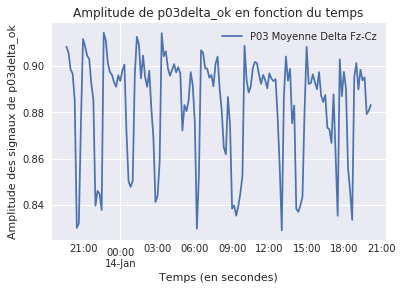

In [38]:
def affichage_signal_data(signal_data, figure=1):
    plt.figure(figure)
    signal_data.plot()
    nom_data = nom_objet(signal_data)
    plt.xlabel('Temps (en secondes)')
    ylab = 'Amplitude des signaux de ' + nom_data
    plt.ylabel(ylab)
    title = 'Amplitude de ' + nom_data + ' en fonction du temps'
    plt.title(title)
    plt.show()

affichage_signal_data(p03delta_ok)

<Figure size 432x288 with 0 Axes>

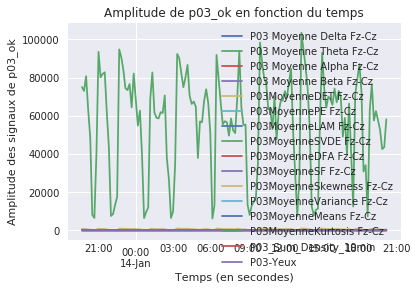

In [39]:
affichage_signal_data(p03_ok)

<Figure size 432x288 with 0 Axes>

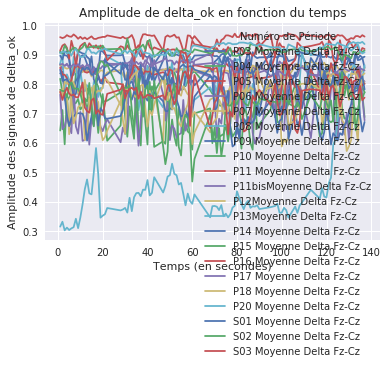

In [40]:
affichage_signal_data(delta_ok)

## Spectre


In [56]:
def densite_spectrale(s):
    densite = np.abs(np.fft.fft(s))**2
    time_step = float(str(s.index[2] - s.index[1])[-5:-3])
    time_step *= 60  # car time_step est actuellement en minute
    if time_step == 0.0:
        time_step = float(str(s.index[2] - s.index[1])[-2:])
    freqs = np.fft.fftfreq(s.size, time_step)
    idx = np.argsort(freqs)
    return freqs[idx], densite[idx]


def spectres_data_dataframe2(data):
    #possèdes des lignes potentiellement inutiles (celles liées à la freq)
    spectres = []
    # on fait les spectres de signaux 1 par 1 (col par col)
    for i in range(len(data.iloc[0, :])):
        si = data.iloc[:, i]
        freqs, sp = densite_spectrale(si)
        spectres.append(sp)
    spectres = pd.DataFrame(spectres)
    spectres = spectres.transpose()
    spectres.index = data.index
    spectres.columns = data.columns
   
    return spectres

In [57]:
spectre_p03delta2 = spectres_data_dataframe2(p03delta_ok)
spectre_p03delta2

,P03 Moyenne Delta Fz-Cz
Temps,
2014-01-13 19:40:00,0.013663
2014-01-13 19:50:00,0.000125
2014-01-13 20:00:00,0.000048
2014-01-13 20:10:00,0.000705
2014-01-13 20:20:00,0.007806
2014-01-13 20:30:00,0.002849
2014-01-13 20:40:00,0.006765
2014-01-13 20:50:00,0.036520
2014-01-13 21:00:00,0.008016


In [48]:
def affichage_spectre_dataframe0(spectre, figure=1):
    N = int(len(spectre)/2)
    spectre.iloc[N+1:].plot()
    nom_spectre = nom_objet(spectre)
    plt.xlabel('Durée (en heure)')
    labelY = 'Densité spectrale de ' + nom_spectre
    plt.ylabel(labelY)     ## PB d'abscisse
    title = 'Densité spectrale de ' + nom_spectre + ' en fonction de la fréquence'
    plt.title(title)
    plt.show()

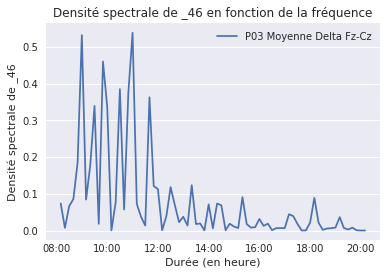

In [49]:
affichage_spectre_dataframe0(spectre_p03delta2)

## Spectrogramme

In [50]:
def affichage_spectrogramme(data, fe, freq_dtxlabel=None, figure=1, cmap=None, nperseg=256, noverlap=None, nfft=None):
    signal = np.array(data.iloc[:])
    nb_signal = signal.shape[1]
    if nb_signal == 1:
        s = np.array(data.iloc[:, 0])
        plt.figure(figure)
        freq, temps, spectro = sg.spectrogram(s, fe, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
        temps_h = temps / 3600
        if freq_dtxlabel is None:
            duree = data.index[-1] - data.index[0]
            duree_heure = duree.total_seconds() / 3600
            freqx = round(duree_heure / len(temps_h), 4)
            freq_dtxlabel = str(freqx) + 'H'
        dtxlabel = pd.date_range(start=data.index[0], periods=len(temps_h), freq=freq_dtxlabel)
        plt.pcolormesh(dtxlabel, freq, spectro, cmap=cmap)
        plt.grid()
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [h]')
        titre = 'Spectrogramme avec nperseg = ' + str(nperseg) + ' noverlap = ' + str(noverlap) + ' et nfft = ' + str(nfft)
        plt.title(titre)
        plt.show()
        return freq, dtxlabel, spectro
    if nb_signal > 1:
        spectro = []
        for i in range(nb_signal):
            s = np.array(data.iloc[:, i])
            plt.figure(figure)
            freq, temps, Sxx = sg.spectrogram(s, fe, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
            temps_h = temps / 3600
            if freq_dtxlabel is None:
                duree = data.index[-1] - data.index[0]
                duree_heure = duree.total_seconds() / 3600
                freqx = round(duree_heure / len(temps_h), 4)
                freq_dtxlabel = str(freqx) + 'H'
            dtxlabel = pd.date_range(start=data.index[0], periods=len(temps_h), freq=freq_dtxlabel)
            plt.pcolormesh(dtxlabel, freq, Sxx, cmap=cmap)
            #plt.pcolormesh(temps_h, freq, Sxx, cmap=cmap)
            plt.grid()
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            titre = 'Spectrogramme avec nperseg = ' + str(nperseg) + ' noverlap = ' + str(noverlap) + ' et nfft = ' + str(nfft)
            plt.title(titre)
            plt.show()
            spectro.append(Sxx)
        return freq, dtxlabel, spectro
    else:
        return "Erreur : il n'y a pas de signal à afficher"

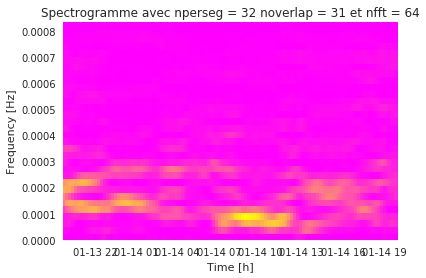

In [51]:
fe = 1/600
D = 32
freq, temps, spectro = affichage_spectrogramme(p03delta_ok, fe, figure=1, cmap='spring', nperseg=D, noverlap=31, nfft=64)

### Zoom du spectrogramme

Spectrogramme de eeg


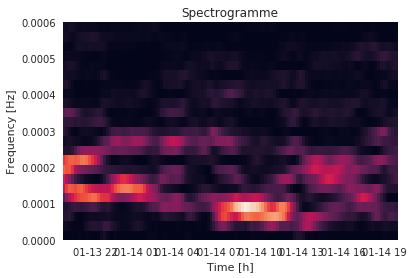

In [53]:
def zoom_spectro(spectro, freq, temps, freq_lim, cmap=None):
    spectro_return = []
    freq_return = []
    for i in range(len(freq)):
        if  freq[i] <= freq_lim:
            spectro_return.append(spectro[i])
            freq_return.append(freq[i])
    plt.pcolormesh(temps, freq_return, spectro_return, cmap=cmap)
    plt.grid()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [h]')
    titre = 'Spectrogramme' 
    plt.title(titre)
    plt.show()
    #return spectro_return, freq_return
    
#eeg
print('Spectrogramme de eeg')
zoom_spectro(spectro, freq, temps, 0.0006)  # avec données de eeg (données moyennes)